In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling as ppr
from fitter import Fitter

In [2]:
%matplotlib inline

In [3]:
# Lectura de los datos
df_Continent = pd.read_csv('../data/Continent_Consumption_TWH.csv')
df_Countries =  pd.read_csv('../data/Country_Consumption_TWH.csv')
df_non_renewable_total = pd.read_csv('../data/nonRenewablesTotalPowerGeneration.csv')
df_renewable_total = pd.read_csv('../data/renewablesTotalPowerGeneration.csv')
df_renewable_power_generation = pd.read_csv('../data/renewablePowerGeneration97-17.csv')
df_top_20renov = pd.read_csv('../data/top20CountriesPowerGeneration.csv')

In [4]:
df_Continent.head()

,Year,World,OECD,BRICS,Europe,North America,Latin America,Asia,Pacific,Africa,Middle-East,CIS
0,1990,101855.54,52602.49,26621.07,20654.88,24667.23,5373.06,24574.19,1197.89,4407.77,2581.86,16049.40
1,1991,102483.56,53207.25,26434.99,20631.62,24841.68,5500.99,24783.53,1186.26,4535.70,2744.68,15898.21
2,1992,102588.23,53788.75,25993.05,20189.68,25341.77,5628.92,25690.67,1209.52,4582.22,3081.95,14339.79
3,1993,103646.56,54614.48,26283.80,20189.68,25830.23,5675.44,26876.93,1267.67,4721.78,3349.44,13246.57
4,1994,104449.03,55579.77,25993.05,20085.01,26365.21,5989.45,28098.08,1279.30,4803.19,3640.19,11606.74


In [5]:
df_Continent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           31 non-null     int64  
 1   World          31 non-null     float64
 2   OECD           31 non-null     float64
 3   BRICS          31 non-null     float64
 4   Europe         31 non-null     float64
 5   North America  31 non-null     float64
 6   Latin America  31 non-null     float64
 7   Asia           31 non-null     float64
 8   Pacific        31 non-null     float64
 9   Africa         31 non-null     float64
 10  Middle-East    31 non-null     float64
 11  CIS            31 non-null     float64
dtypes: float64(11), int64(1)
memory usage: 3.0 KB


In [14]:
profile = ppr.ProfileReport(df_Continent, title='Pandas Profiling Report', minimal=True)

In [15]:
profile.to_file('../data/reports/Continent_Consumption_TWH.html')

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 500.45it/s]


In [5]:
df_Continent['World'].describe()

count        31.000000
mean     132792.465484
std       22724.116555
min      101855.540000
25%      111176.985000
50%      133582.180000
75%      154853.450000
max      167553.410000
Name: World, dtype: float64

In [15]:
# Notamos que los datos de Year se encuentran como los índices del dataset
# Restablecemos el índica y hacemos que el índice anterior que correspondía a los años se agregue como columna
df_Continent_years = df_Continent.reset_index()
df_Continent_years.head()

,Year,World,OECD,BRICS,Europe,North America,Latin America,Asia,Pacific,Africa,Middle-East,CIS
0,1990,101855.54,52602.49,26621.07,20654.88,24667.23,5373.06,24574.19,1197.89,4407.77,2581.86,16049.40
1,1991,102483.56,53207.25,26434.99,20631.62,24841.68,5500.99,24783.53,1186.26,4535.70,2744.68,15898.21
2,1992,102588.23,53788.75,25993.05,20189.68,25341.77,5628.92,25690.67,1209.52,4582.22,3081.95,14339.79
3,1993,103646.56,54614.48,26283.80,20189.68,25830.23,5675.44,26876.93,1267.67,4721.78,3349.44,13246.57
4,1994,104449.03,55579.77,25993.05,20085.01,26365.21,5989.45,28098.08,1279.30,4803.19,3640.19,11606.74


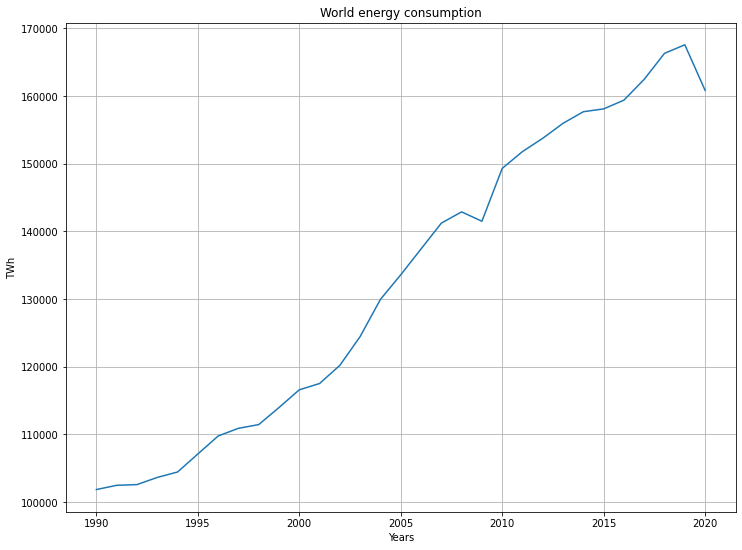

In [7]:
world_energy_consumption = df_Continent['World'].values
years = df_Continent_years['Year'].values

plt.figure(figsize=(12,9))
plt.plot(years,world_energy_consumption)
plt.xlabel('Years')
plt.ylabel('TWh')
plt.title('World energy consumption')
plt.grid(True)
plt.show()



Podemos ver claramente que el consumo energético en el mundo aumenta cada año. Pero notamos dos cambios abruptos cerca del 2008-2009 y 2020. Podríamos asociar estos cambios a:
- 2008-2009: Gran recesión o crisis económica iniciada en el 2008, pero que se evidenció en el 2009.
- 2019-2020: En Noviembre del 2019 se encontró el primer caso de Covid19 y en el 2020 se delcaró pandemia mundial.

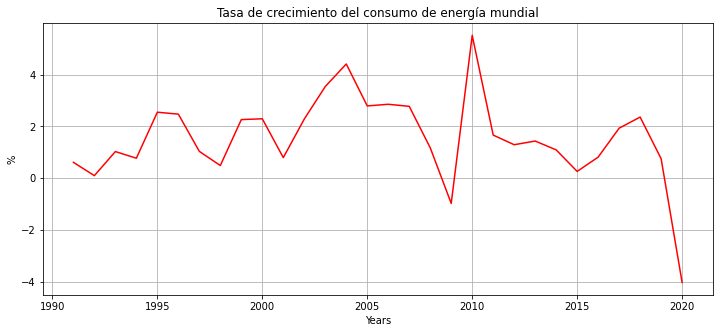

In [10]:
tasa_crecimiento = df_Continent['World'].pct_change().mul(100) 

plt.figure(figsize=(12,5))
plt.plot(years,tasa_crecimiento, 'r')
plt.xlabel('Years')
plt.ylabel('%')
plt.title('Tasa de crecimiento del consumo de energía mundial')
plt.grid(True)
plt.show()

# Preguntas de investigacion
Identificamos 3 ejes de análisis:
- Consumo energético
- Fuentes de generación de energía
- Crecimiento de demanda energética.

### Consumo energético
1. ¿Qué organizaciones consumen más energía?
1. ¿Qué países consumen más energía?
### Crecimiento de demanda energética
1. ¿Qué países han tenido mayor crecimiento en la demanda energética y cuáles han tenido disminuciones de demanda?
### Fuentes de generación de energía
1. ¿Cuáles son las principales fuentes de generacion de energía de los países, continentes, organizaciónes?
1. ¿Qué fuentes de energía renovable son las de mayor crecimiento?
1. ¿Qué países y organizaciones tienen fuentes de generación más limpias (Renvables o no Renovables)?

Ejes de exploración: Consumo, Fuentes, crecimiento

## Consumo energético

In [11]:
continentes = ['Year','Asia','Africa','Europe','North America','Latin America']
organization_name = ['Year','OECD','CIS','Middle-East','BRICS']

In [12]:
# Consumo energético por Organizaciones
df_org_cons = df_Continent_years[organization_name]
df_org_cons.head()

,Year,OECD,CIS,Middle-East,BRICS
0,1990,52602.49,16049.40,2581.86,26621.07
1,1991,53207.25,15898.21,2744.68,26434.99
2,1992,53788.75,14339.79,3081.95,25993.05
3,1993,54614.48,13246.57,3349.44,26283.80
4,1994,55579.77,11606.74,3640.19,25993.05


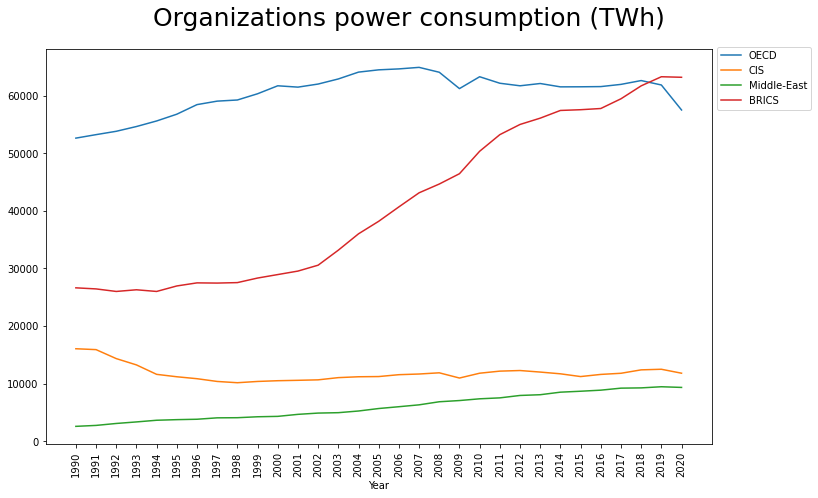

In [13]:
ax = df_org_cons.plot(x='Year',y=df_org_cons.columns[1:], figsize=(12,7))
fig = ax.get_figure()
ax.set_xticks(df_org_cons['Year'])
ax.tick_params(axis='x', rotation=90)
ax.legend(bbox_to_anchor=(1,1.02), loc='upper left')
fig.tight_layout(pad=3)
fig.suptitle('Organizations power consumption (TWh)', fontsize=25, y=1.02)

plt.show()

Conformación de las organizaciones
- OECD
- CIS
- Middle-East
- BRICS

In [14]:
# Consumo energético por Continentes
df_cont_cons = df_Continent_years[continentes]
df_cont_cons.head()

,Year,Asia,Africa,Europe,North America,Latin America
0,1990,24574.19,4407.77,20654.88,24667.23,5373.06
1,1991,24783.53,4535.70,20631.62,24841.68,5500.99
2,1992,25690.67,4582.22,20189.68,25341.77,5628.92
3,1993,26876.93,4721.78,20189.68,25830.23,5675.44
4,1994,28098.08,4803.19,20085.01,26365.21,5989.45


Text(0.5, 1.02, 'Continents power consumption (TWh)')

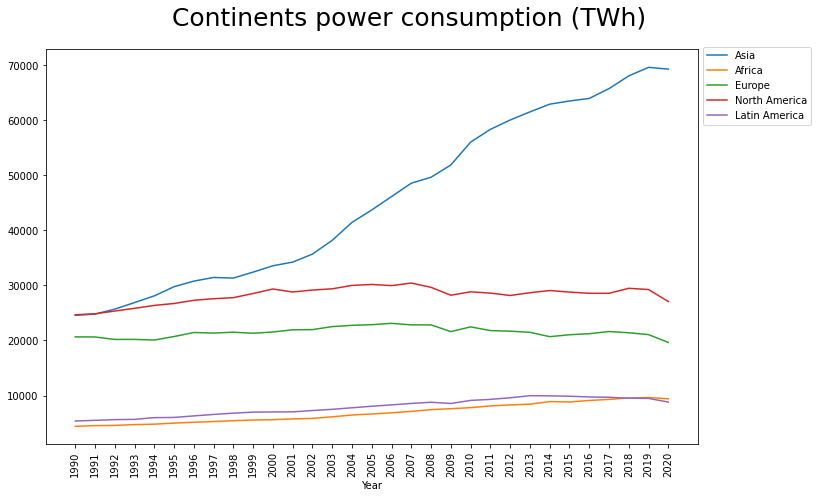

In [15]:
ax1 = df_cont_cons.plot(x='Year',y=df_cont_cons.columns[1:], figsize=(12,7))
fig1 = ax1.get_figure()
ax1.set_xticks(df_org_cons['Year'])
ax1.tick_params(axis='x', rotation=90)
ax1.legend(bbox_to_anchor=(1,1.02), loc='upper left')
fig1.tight_layout(pad=3)
fig1.suptitle('Continents power consumption (TWh)', fontsize=25, y=1.02)


In [21]:
profile_countries = ppr.ProfileReport(df_Countries, title='Pandas Profiling Report', minimal=True)
profile_countries.to_file('../data/reports/Continent_Countries_TWH.html')

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 200.14it/s]


In [17]:
# Del resultado de mostrar el reporte del DataFrame con Pandas Profiling, vemos que las filas 31 y 32 tienen NaN en todas las variables
df_Countries.tail()

,Year,China,United States,Brazil,Belgium,Czechia,France,Germany,Italy,Netherlands,...,Australia,New Zealand,Algeria,Egypt,Nigeria,South Africa,Iran,Kuwait,Saudi Arabia,United Arab Emirates
28,2018.0,3201.0,2236.0,288.0,53.0,43.0,246.0,302.0,151.0,73.0,...,128.0,20.0,61.0,96.0,160.0,134.0,266.0,34.0,214.0,78.0
29,2019.0,3309.0,2214.0,293.0,55.0,43.0,243.0,294.0,149.0,72.0,...,129.0,21.0,65.0,97.0,157.0,129.0,269.0,36.0,215.0,83.0
30,2020.0,3381.0,2046.0,286.0,51.0,39.0,217.0,275.0,137.0,70.0,...,126.0,21.0,59.0,92.0,159.0,124.0,268.0,38.0,209.0,81.0
31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
df_Countries_na = df_Countries['China'].isna().sum()
print(df_Countries_na)
print(round(df_Countries_na/df_Countries.shape[0]*100,2),'%')

2
6.06 %


In [19]:
df_Countries.isnull().sum()

Year                    2
China                   2
United States           2
Brazil                  2
Belgium                 2
Czechia                 2
France                  2
Germany                 2
Italy                   2
Netherlands             2
Poland                  2
Portugal                2
Romania                 2
Spain                   2
Sweden                  2
United Kingdom          2
Norway                  2
Turkey                  2
Kazakhstan              2
Russia                  2
Ukraine                 2
Uzbekistan              2
Argentina               2
Canada                  2
Chile                   2
Colombia                2
Mexico                  2
Venezuela               2
Indonesia               2
Japan                   2
Malaysia                2
South Korea             2
Taiwan                  2
Thailand                2
India                   2
Australia               2
New Zealand             2
Algeria                 2
Egypt       

In [20]:
nan_rows = df_Countries[df_Countries.isnull().any(1)]
nan_rows

,Year,China,United States,Brazil,Belgium,Czechia,France,Germany,Italy,Netherlands,...,Australia,New Zealand,Algeria,Egypt,Nigeria,South Africa,Iran,Kuwait,Saudi Arabia,United Arab Emirates
31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
# Hemos localizado las filas con los valores NaN, se trata de las dos ultimas filas de cada variable
df_Countries_sin_nan = df_Countries.dropna(how='any')
df_Countries_sin_nan.tail()

,Year,China,United States,Brazil,Belgium,Czechia,France,Germany,Italy,Netherlands,...,Australia,New Zealand,Algeria,Egypt,Nigeria,South Africa,Iran,Kuwait,Saudi Arabia,United Arab Emirates
26,2016.0,2977.0,2168.0,287.0,56.0,41.0,248.0,310.0,151.0,74.0,...,127.0,21.0,56.0,88.0,150.0,135.0,246.0,36.0,215.0,79.0
27,2017.0,3070.0,2161.0,292.0,55.0,43.0,247.0,311.0,154.0,74.0,...,128.0,21.0,57.0,93.0,152.0,136.0,262.0,34.0,219.0,78.0
28,2018.0,3201.0,2236.0,288.0,53.0,43.0,246.0,302.0,151.0,73.0,...,128.0,20.0,61.0,96.0,160.0,134.0,266.0,34.0,214.0,78.0
29,2019.0,3309.0,2214.0,293.0,55.0,43.0,243.0,294.0,149.0,72.0,...,129.0,21.0,65.0,97.0,157.0,129.0,269.0,36.0,215.0,83.0
30,2020.0,3381.0,2046.0,286.0,51.0,39.0,217.0,275.0,137.0,70.0,...,126.0,21.0,59.0,92.0,159.0,124.0,268.0,38.0,209.0,81.0


In [22]:
only_countries = list(set(df_Countries_sin_nan.columns) - set(['Year']))

# Sacamos la media de consumo por cada pais
df_Countries_mean = df_Countries_sin_nan[only_countries].mean()
df_Countries_mean

Thailand                  95.612903
Netherlands               74.870968
Uzbekistan                46.774194
Egypt                     60.935484
Nigeria                  108.967742
Chile                     28.032258
Portugal                  22.225806
Canada                   259.516129
Poland                    97.419355
United Arab Emirates      49.064516
South Korea              212.419355
Saudi Arabia             138.387097
Iran                     169.064516
Sweden                    49.258065
Venezuela                 56.290323
Malaysia                  61.225806
Italy                    162.903226
Kuwait                    23.161290
France                   251.193548
Spain                    117.838710
Indonesia                171.741935
Ukraine                  139.064516
New Zealand               17.612903
South Africa             118.193548
China                   1923.322581
Taiwan                    89.032258
Australia                112.645161
Romania                   39

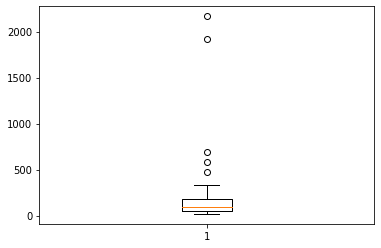

In [23]:
# Este gráfico nos permite ver dónde están más agrupados nuestro conjunto de datos (medias de consumo por pais)
plt.boxplot(df_Countries_mean)
plt.show()

In [25]:
df_med = df_Countries_mean.mean()
print(df_med)

225.9692082111437


A pesar de que la media de las medias de consumo por país es 225.969, puse como límite mínimo 210 para obtener los 10 países con mayor consumo energético. Esto debido a que China y USA elevan bastante el promedio.

In [30]:
df_top_ten = df_Countries_sin_nan.loc[:,df_Countries_sin_nan.mean(axis=0) > 210]
df_top_ten.head()

,Year,China,United States,Brazil,France,Germany,Russia,Canada,Japan,South Korea,India
0,1990.0,874.0,1910.0,141.0,225.0,351.0,879.0,211.0,440.0,94.0,306.0
1,1991.0,848.0,1925.0,143.0,237.0,344.0,871.0,210.0,445.0,101.0,318.0
2,1992.0,877.0,1964.0,145.0,234.0,338.0,795.0,216.0,455.0,111.0,330.0
3,1993.0,929.0,1998.0,148.0,238.0,335.0,751.0,223.0,458.0,125.0,338.0
4,1994.0,973.0,2036.0,156.0,231.0,333.0,657.0,231.0,483.0,133.0,351.0


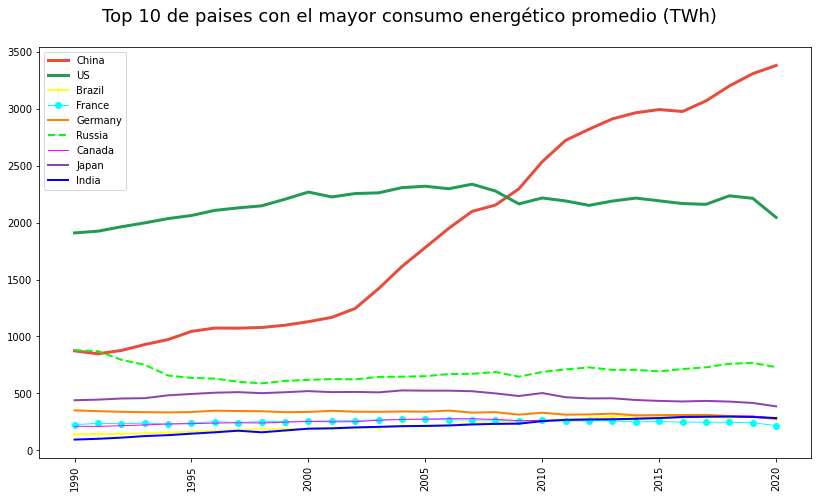

In [31]:
## Aquí hago la gráfica de los 10 países que mas consumen
fig , ax = plt.subplots(figsize=(12,7))

x1 = df_top_ten.iloc[:,0]

y1 = df_top_ten.iloc[:,1]
y2 = df_top_ten.iloc[:,2]
y3 = df_top_ten.iloc[:,3]
y4 = df_top_ten.iloc[:,4]
y5 = df_top_ten.iloc[:,5]
y6 = df_top_ten.iloc[:,6]
y7 = df_top_ten.iloc[:,7]
y8 = df_top_ten.iloc[:,8]
y9 = df_top_ten.iloc[:,9]

ax.tick_params(axis='x', rotation=90)

plt.plot(x1, y1, marker ='', linewidth=3, label='China', color='#E74C3C')
plt.plot(x1, y2, marker ='', linewidth=3, label = 'US', color='#239B56')
plt.plot(x1, y3, marker ='+', linewidth=2, label = 'Brazil', color='#FFFF25')
plt.plot(x1, y4, marker ='o', linewidth=1, label='France', color='#00FFFF')
plt.plot(x1, y5, marker ='', linewidth=2, label='Germany', color='#FF8000')
plt.plot(x1, y6, marker ='', linewidth=2, linestyle='dashed', label='Russia', color='#00FF00')
plt.plot(x1, y7, marker ='', linewidth=1, label='Canada', color='#FF00FF')
plt.plot(x1, y8, marker ='', linewidth=2, label='Japan', color='#8E44AD')
plt.plot(x1, y9, marker ='', linewidth=2, label='India', color='#0000FF')

plt.legend(fontsize=10)
fig.tight_layout(pad=3) # tight_layout nos ayuda a ajustar el relleno del plot y el parametro pad sirve para ajustar el relleno entre el borde de la figura y los bordes de las subtramas (como fraccion)
fig.suptitle('Top 10 de paises con el mayor consumo energético promedio (TWh)', fontsize=18, y=1.02)

plt.show()

Conclusion del gráfico

In [40]:
df_Countries_f = df_Countries_sin_nan.set_index(df_Countries_sin_nan['Year'])
df_Countries_f = df_Countries_f.drop(columns=['Year'])
df_Countries_f.head(40)

,China,United States,Brazil,Belgium,Czechia,France,Germany,Italy,Netherlands,Poland,...,Australia,New Zealand,Algeria,Egypt,Nigeria,South Africa,Iran,Kuwait,Saudi Arabia,United Arab Emirates
Year,,,,,,,,,,,,,,,,,,,,,
1990.0,874.0,1910.0,141.0,48.0,50.0,225.0,351.0,147.0,67.0,103.0,...,86.0,14.0,22.0,33.0,66.0,90.0,69.0,9.0,58.0,20.0
1991.0,848.0,1925.0,143.0,50.0,45.0,237.0,344.0,150.0,69.0,101.0,...,85.0,14.0,23.0,33.0,70.0,92.0,77.0,3.0,68.0,23.0
1992.0,877.0,1964.0,145.0,51.0,44.0,234.0,338.0,149.0,69.0,99.0,...,87.0,14.0,24.0,34.0,72.0,88.0,81.0,9.0,77.0,22.0
1993.0,929.0,1998.0,148.0,49.0,43.0,238.0,335.0,149.0,70.0,101.0,...,91.0,15.0,24.0,35.0,74.0,94.0,87.0,12.0,80.0,23.0
1994.0,973.0,2036.0,156.0,52.0,41.0,231.0,333.0,147.0,70.0,96.0,...,91.0,15.0,23.0,34.0,72.0,98.0,97.0,14.0,84.0,26.0
1995.0,1045.0,2063.0,162.0,53.0,42.0,240.0,336.0,159.0,73.0,99.0,...,93.0,15.0,24.0,36.0,73.0,104.0,101.0,15.0,85.0,28.0
1996.0,1074.0,2108.0,170.0,56.0,43.0,251.0,348.0,159.0,77.0,104.0,...,99.0,16.0,23.0,38.0,76.0,107.0,98.0,14.0,90.0,29.0
1997.0,1073.0,2130.0,179.0,56.0,43.0,244.0,345.0,162.0,75.0,102.0,...,101.0,16.0,24.0,40.0,79.0,109.0,109.0,15.0,86.0,31.0
1998.0,1079.0,2148.0,183.0,57.0,42.0,252.0,343.0,166.0,75.0,95.0,...,104.0,16.0,25.0,42.0,80.0,111.0,111.0,17.0,92.0,32.0


# Crecimiento porcentual 
Cálculo del cambio porcentual más alto y más bajo del consumo de energía de 1990 a 2020.

In [41]:
df_crecimiento = df_Countries_f.append(df_Countries_f.iloc[[0,-1]].pct_change().iloc[-1].mul(100).rename('pct_Crecimiento'))
df_crecimiento = df_crecimiento.reset_index()
pct_Crecimiento = df_crecimiento.loc[[31]]
pct_Crecimiento.head()

C:\Users\Marco Alvarado\AppData\Local\Temp\ipykernel_15792\2181123971.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_crecimiento = df_Countries_f.append(df_Countries_f.iloc[[0,-1]].pct_change().iloc[-1].mul(100).rename('pct_Crecimiento'))


,Year,China,United States,Brazil,Belgium,Czechia,France,Germany,Italy,Netherlands,...,Australia,New Zealand,Algeria,Egypt,Nigeria,South Africa,Iran,Kuwait,Saudi Arabia,United Arab Emirates
31,pct_Crecimiento,286.842105,7.120419,102.836879,6.25,-22.0,-3.555556,-21.652422,-6.802721,4.477612,...,46.511628,50.0,168.181818,178.787879,140.909091,37.777778,288.405797,322.222222,260.344828,305.0


In [42]:
# Entonces creamos el dataframe correspondiente al porcentaje de crecimiento 
df_pct_crecimiento = pct_Crecimiento.iloc[-1].reset_index()
df_pct_crecimiento = df_pct_crecimiento.drop(0)
df_pct_crecimiento = df_pct_crecimiento.rename(columns={'index':'Country',31:'pct_Crecimiento'})

convertion_dict = {'Country': str,'pct_Crecimiento':float}

df_pct_crecimiento = df_pct_crecimiento.astype(convertion_dict)
df_pct_crecimiento_top = df_pct_crecimiento.nlargest(20,'pct_Crecimiento').reset_index()
df_pct_crecimiento_top.head(20)

,index,Country,pct_Crecimiento
0,42,Kuwait,322.222222
1,30,Malaysia,319.047619
2,44,United Arab Emirates,305.000000
3,41,Iran,288.405797
4,1,China,286.842105
5,43,Saudi Arabia,260.344828
6,31,South Korea,201.063830
7,33,Thailand,197.619048
8,34,India,196.732026
9,38,Egypt,178.787879


<BarContainer object of 20 artists>

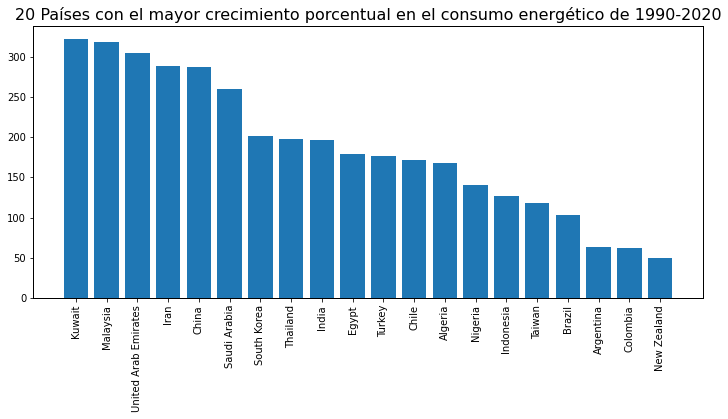

In [50]:
# graficamos la información obtenida en nuestro nuevo dataframe 
plt.subplots(figsize=(12,5))

# plt.rcParams['axes.linewidth']=1

Xpct = df_pct_crecimiento_top.iloc[:,1]
ypct = df_pct_crecimiento_top.iloc[:,2]

plt.xticks(rotation=90)
plt.title('20 Países con el mayor crecimiento porcentual en el consumo energético de 1990-2020', fontsize=16)
plt.bar(Xpct, ypct)

In [51]:
# de la misma forma mostraremos los paises con porcentaje de crecimiento energético más bajo
df_pct_crecimiento_low = pct_Crecimiento.iloc[-1].reset_index()
df_pct_crecimiento_low = df_pct_crecimiento.rename(columns={'index':'Country',31:'pct_Crecimiento'})
# convertion_dict = {'Country': str,'pct_Crecimiento':float}
df_pct_crecimiento_low = df_pct_crecimiento_low.astype(convertion_dict)
df_pct_crecimiento_low = df_pct_crecimiento_low.nsmallest(20,'pct_Crecimiento').reset_index()
df_pct_crecimiento_low.head(20)

,index,Country,pct_Crecimiento
0,20,Ukraine,-65.873016
1,12,Romania,-48.387097
2,27,Venezuela,-27.500000
3,15,United Kingdom,-25.242718
4,5,Czechia,-22.000000
5,7,Germany,-21.652422
6,19,Russia,-16.837315
7,29,Japan,-12.272727
8,8,Italy,-6.802721
9,21,Uzbekistan,-6.382979


<BarContainer object of 20 artists>

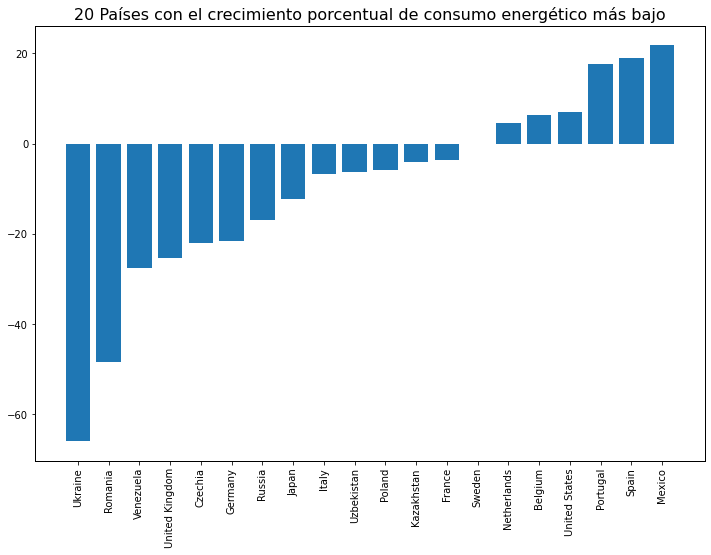

In [54]:
plt.subplots(figsize=(12,8)) 

Xpct = df_pct_crecimiento_low.iloc[:,1]
ypct = df_pct_crecimiento_low.iloc[:,2]

plt.xticks(rotation=90)
plt.title('20 Países con el crecimiento porcentual de consumo energético más bajo', fontsize=16)
plt.bar(Xpct, ypct)

# Fuentes de energía 
- Renovables
- No renovables

## Fuentes de Energía Renovable
### Top 20 países con generación de energía renovable

In [59]:
df_top_20renov.head(20)

,Country,Hydro(TWh),Biofuel(TWh),Solar PV (TWh),Geothermal (TWh),Total (TWh)
0,China,1189.84,295.0200,79.43,0.1250,1819.9400
1,USA,315.62,277.9100,58.95,18.9600,758.6190
2,Brazil,370.90,42.3700,52.25,0.0000,466.3500
3,Canada,383.48,29.6500,7.12,0.0000,424.0900
4,India,141.80,51.0600,43.76,0.0000,262.6500
5,Germany,24.17,111.5900,45.10,0.1600,227.1800
6,Russia,187.13,0.1400,0.08,0.4300,188.3300
7,Japan,90.67,7.6300,19.01,2.4400,187.3490
8,France,70.13,28.5000,5.87,0.1300,114.8200
9,Italy,50.92,17.4900,16.85,6.0800,113.9900


Text(0.5, 1.02, 'Top 20 Países generadores de Energía Renovable (TWh)')

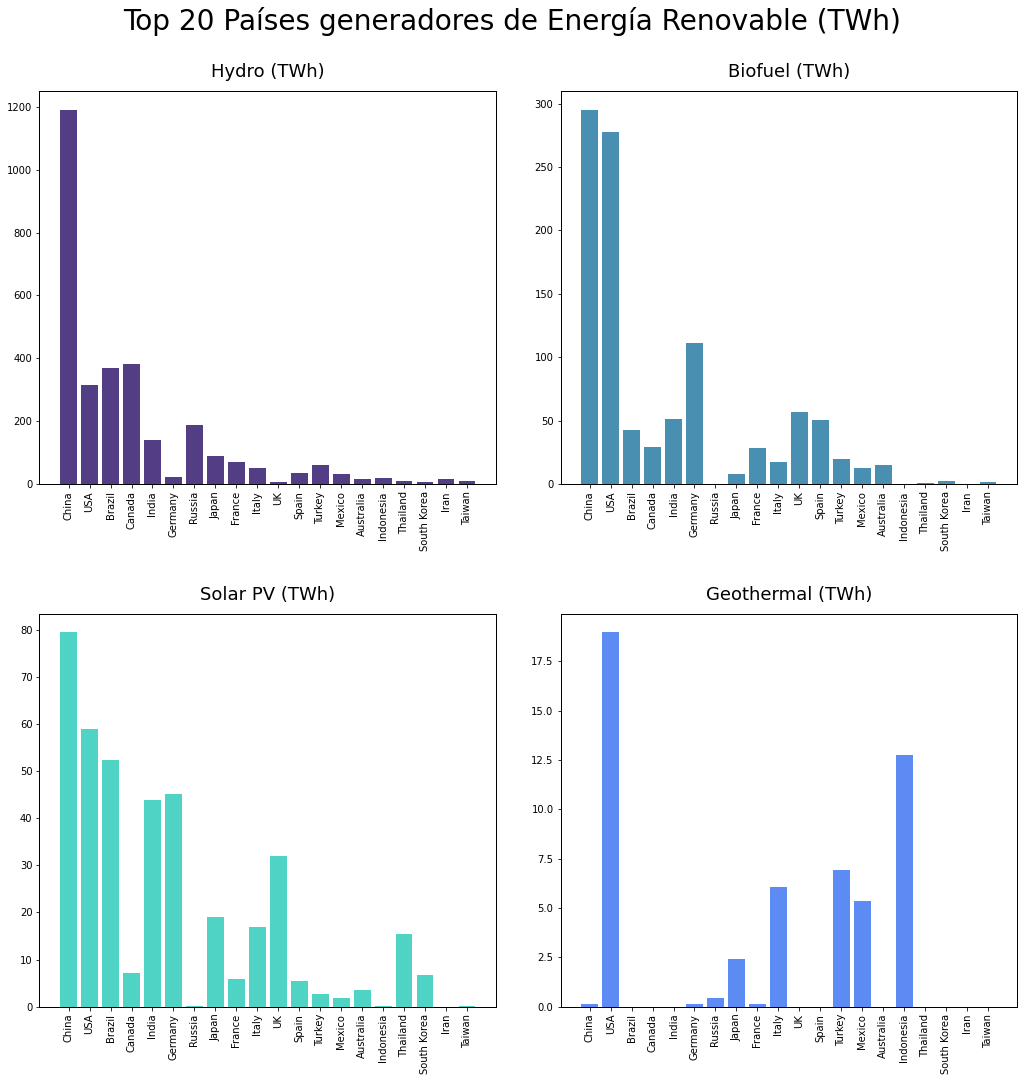

In [74]:
fig, ax = plt.subplots(2,2, figsize=(15,15))
X1 = df_top_20renov.iloc[:,0]
y1 = df_top_20renov.iloc[:,1]

X2 = df_top_20renov.iloc[:,0]
y2 = df_top_20renov.iloc[:,2]

X3 = df_top_20renov.iloc[:,0]
y3 = df_top_20renov.iloc[:,3]

X4 = df_top_20renov.iloc[:,0]
y4 = df_top_20renov.iloc[:,4]

ax[0,0].tick_params(axis='x', rotation=90)
ax[0,1].tick_params(axis='x', rotation=90)
ax[1,0].tick_params(axis='x', rotation=90)
ax[1,1].tick_params(axis='x', rotation=90)

ax[0,0].bar(X1,y1,width=.8, color=['#533E85'])
ax[0,1].bar(X2,y2,width=.8,color=['#488FB1'])
ax[1,0].bar(X3,y3,width=.8,color=['#4FD3C4'])
ax[1,1].bar(X4,y4,width=.8,color=['#5D8BF4'])

ax[0,0].set_title('Hydro (TWh)',fontsize=18, y=1.02)
ax[0,1].set_title('Biofuel (TWh)',fontsize=18, y=1.02)
ax[1,0].set_title('Solar PV (TWh)',fontsize=18, y=1.02)
ax[1,1].set_title('Geothermal (TWh)',fontsize=18, y=1.02)

fig.tight_layout(pad=3.5)
fig.suptitle('Top 20 Países generadores de Energía Renovable (TWh)', fontsize=28, y=1.02)

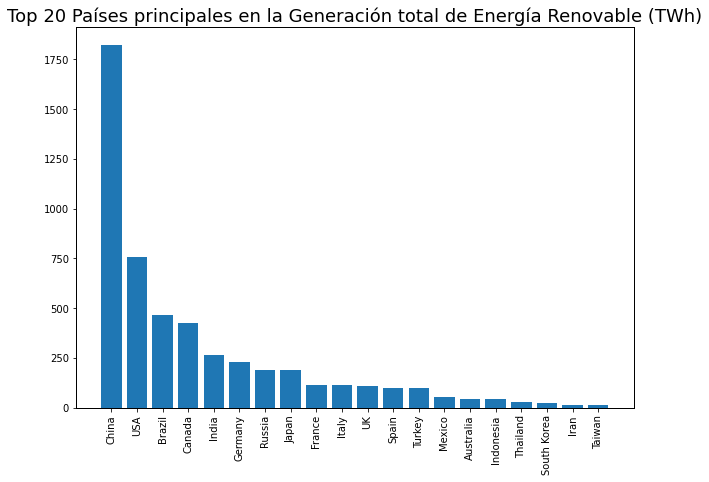

In [77]:
fig, ax = plt.subplots(1, figsize=(10,7))

X_total=df_top_20renov['Country']
y_total=df_top_20renov['Total (TWh)']
plt.bar(X_total, y_total)
plt.title('Top 20 Países principales en la Generación total de Energía Renovable (TWh)', size=18)
ax.tick_params(axis='x', rotation=90)

In [93]:
# Fuentes de generación de energía renovable
df_renewable_total = df_renewable_total.drop([8])
df_renewable_total.head(10)

,Mode of Generation,Contribution (TWh)
0,Hydro,9863.33
1,Wind,5882.82
2,Biofuel,2636.03
3,Solar PV,841.87
4,Geothermal,114.04
5,Renewable waste,74.05
6,Solar Thermal,36.02
7,Tidal,19448.16


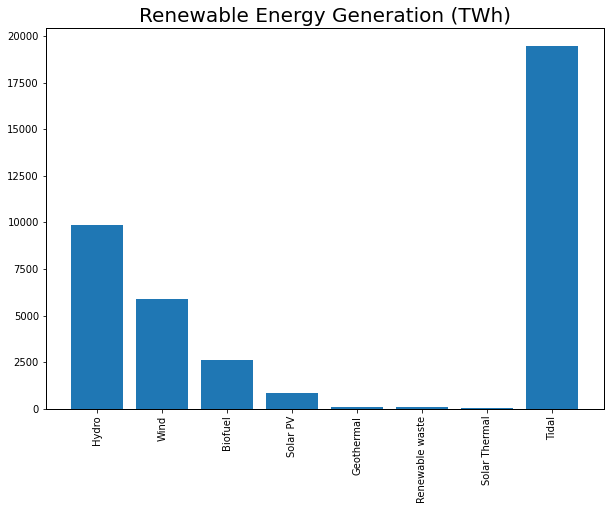

In [98]:
fig, ax = plt.subplots(1, figsize=(10,7))

X_total=df_renewable_total['Mode of Generation']
y_total=df_renewable_total['Contribution (TWh)']
plt.bar(X_total, y_total)
plt.title('Renewable Energy Generation (TWh)', size=20)
ax.tick_params(axis='x', rotation=90)

## Fuentes de Energía No Renovable

In [110]:
df_non_renewable = df_non_renewable_total.drop(7)
df_non_renewable

,Mode of Generation,Contribution (TWh)
0,Coal,9863.33
1,Natural Gas,5882.82
2,Nuclear,2636.03
3,Oil,841.87
4,Waste,114.04
5,Municipal Wastes,74.05
6,Others,36.02


In [112]:
df_non_renewable['Contribution (TWh)'].sum()

19448.16

## Crecimiento en la generación energética Renovable por fuente (1990 - 2017)

In [128]:
print(df_renewable_power_generation)

    Year  Hydro(TWh)  Biofuel(TWh)  Solar PV (TWh)  Geothermal (TWh)
0   1990     2191.67          3.88            0.09             36.42
1   1991     2268.63          4.19            0.10             37.39
2   1992     2267.16          4.63            0.12             39.30
3   1993     2397.67          5.61            0.15             40.23
4   1994     2419.73          7.31            0.17             41.05
5   1995     2545.96          7.95            0.19             39.89
6   1996     2583.18          9.45            0.22             42.18
7   1997     2614.54         12.08            0.27             42.38
8   1998     2628.63         16.07            0.35             45.35
9   1999     2636.26         21.52            0.61             48.66
10  2000     2695.85         31.34            0.99             51.98
11  2001     2638.20         38.45            1.32             51.57
12  2002     2711.12         52.85            1.58             52.29
13  2003     2726.33         64.23

Text(0.5, 1.02, 'Generación de Energía por Fuente Renovable (TWh)')

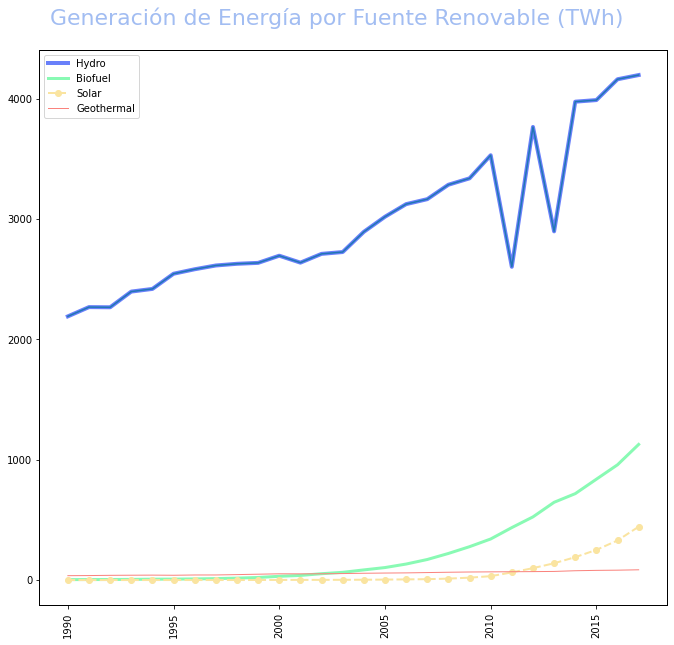

In [130]:
fig, ax = plt.subplots(figsize=(10,9))

X5 = df_renewable_power_generation.iloc[:,0]
y5 = df_renewable_power_generation.iloc[:,1]
y6 = df_renewable_power_generation.iloc[:,2]
y7 = df_renewable_power_generation.iloc[:,3]
y8 = df_renewable_power_generation.iloc[:,4]

ax.tick_params(axis='x', rotation=90)

plt.plot( X5, y5, marker='', markerfacecolor='blue', markersize=12, color='#6980FA', linewidth=4, label="Hydro")
plt.plot( X5, y6, marker='', color='#89FAB4', linewidth=3, label="Biofuel")
plt.plot( X5, y7, marker='o', color='#FAE4A0', linewidth=2, linestyle='dashed', label="Solar")
plt.plot( X5, y8, marker='', color='#FA837D', linewidth=1, label="Geothermal")

plt.plot(X5, y5)
plt.legend()
fig.tight_layout(pad=3)
fig.suptitle('Generación de Energía por Fuente Renovable (TWh)', fontsize=22, y=1.02, color='#A2BDF2')